In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
seed = 0
np.random.seed(seed)

m1 = -1
std1 = 2
n1 = 100

a = -2
b = 0
n2 = 100

m3 = 2
std3 = 1
n3 = 200

In [5]:
var1 = std1**2
m2 = (a + b) / 2
var2 = ((a-b)**2)/12
std2 = (((a-b)**2)/12)**0.5
var3 = std3**2
print(m2, var2, std2)

-1.0 0.3333333333333333 0.5773502691896257


In [16]:
s1 = sts.norm.rvs(loc=m1, scale=std1, size=n1, random_state=seed)
s2 = sts.uniform.rvs(loc=a, scale=b-a, size=n2, random_state=seed)
s3 = sts.norm.rvs(loc=m3, scale=std3, size=n3, random_state=seed)
pooled = np.concatenate((s1, s2, s3), axis=0)
d1 = sts.describe(s1)
d2 = sts.describe(s2)
d3 = sts.describe(s3)
d4 = sts.describe(pooled)
print(d1[2], d1[3], d1[3]**0.5)
print(d2[2], d2[3], d2[3]**0.5)
print(d3[2], d3[3], d3[3]**0.5)
print(d4[2], d4[3], d4[3]**0.5)

-0.8803839689310301 4.1043499766259846 2.0259195385370035
-1.0544123209749647 0.3358295573914843 0.579508030480583
2.0709104931411613 1.048547208452857 1.0239859415308674
0.551756174094082 3.942067417913189 1.9854640308787237


{'whiskers': [<matplotlib.lines.Line2D at 0x2c1bb05eec8>,
 'caps': [<matplotlib.lines.Line2D at 0x2c1bb065e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c1bb05ec48>,
 'medians': [<matplotlib.lines.Line2D at 0x2c1bb06db08>,
 'fliers': [<matplotlib.lines.Line2D at 0x2c1bb072b08>,
 'means': []}

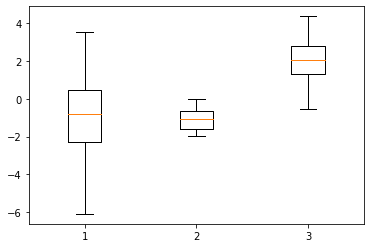

In [18]:
plt.boxplot([s1, s2, s3])

In [19]:
print(sts.bartlett(s1, s2, s3))

BartlettResult(statistic=152.87709802084396, pvalue=6.355649811215557e-34)


In [27]:
n = n1 + n2 + n3
s = np.array((s1, s2, s3))
k = len(s)
x_mean = np.mean(pooled)
Db = (1 / n) * sum([len(s[i]) * ((np.mean(s[i]) - x_mean) ** 2) for i in range(k)])
print(Db, k-1, n*Db/(k-1))
Dw =  (1 / n) * sum([len(s[i]) * np.std(s[i]) for i in range(k)])
print(Dw, n-k, n*Dw/(n-k))
Dx = Dw + Db
print(Dx, n-1, n*Dx/(n-1))
h2 = Db / Dx
h = h2**0.5
print(h2, h)
print(sts.f_oneway(s1, s2, s3))

2.3116155784937864 2 462.3231156987573
1.1588033092139327 397 1.1675600092835594
3.4704188877077193 399 3.479116679406235
0.6660912279729593 0.816144122059921
F_onewayResult(statistic=283.13996972693803, pvalue=3.846282233336266e-77)


In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
groups = np.concatenate(([1]*n1, [2]*n2, [3]*n3))
tukey = pairwise_tukeyhsd(endog=pooled, groups=groups, alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.174,0.5931,-0.5992,0.2511,False
1,3,2.9513,0.001,2.5831,3.3195,True
2,3,3.1253,0.001,2.7571,3.4935,True


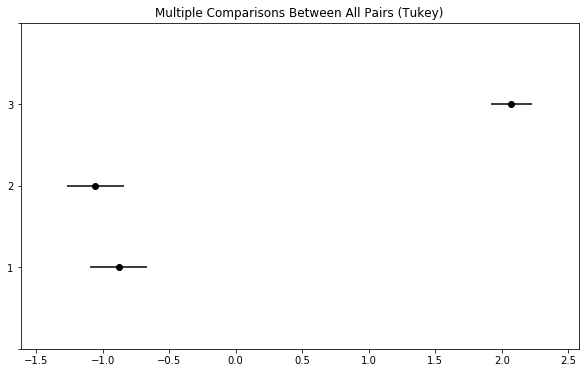

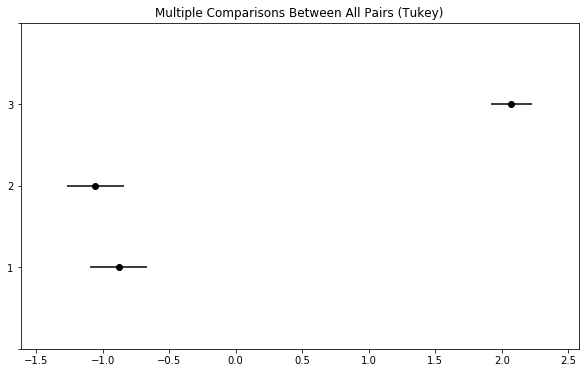

In [36]:
tukey.plot_simultaneous()